In [1]:
# Importing necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count, desc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Movie Ratings Analysis") \
    .getOrCreate()

In [3]:
# Load the dataset into a DataFrame
ratings_data = spark.read.csv("ratings.csv", header=True, inferSchema=True)

# Display the first few rows of the dataset
ratings_data.show(5)

+------+-------+------+-------------------+
|userId|movieId|rating|             tstamp|
+------+-------+------+-------------------+
|   206|   4803|   4.0|2003-04-07 13:52:01|
|  5073|  72731|   4.0|2020-02-19 16:07:53|
|  4739|  91653|   4.0|2020-12-28 15:35:58|
|   535|   3005|   3.0|2008-12-26 05:38:11|
|   465|   4776|   3.0|2008-08-13 20:22:36|
+------+-------+------+-------------------+
only showing top 5 rows



In [4]:
# Calculate the average rating for each movie
average_ratings_data = ratings_data.groupBy("movieId").agg(avg("rating").alias("avg_rating"))

# Calculate the number of ratings each movie received
ratings_count_data = ratings_data.groupBy("movieId").agg(count("rating").alias("num_ratings"))

# Filter movies that have at least 50 ratings
popular_movies_data = ratings_count_data.filter(col("num_ratings") >= 50)

In [5]:
# Join with average ratings DataFrame to get the stats for popular movies
popular_movie_stats_data = popular_movies_data.join(average_ratings_data, on="movieId")

# Display the top 10 movies with the highest average ratings that have at least 50 ratings
popular_movie_stats_data.orderBy(col("avg_rating").desc()).show(10)

+-------+-----------+------------------+
|movieId|num_ratings|        avg_rating|
+-------+-----------+------------------+
| 171011|        660| 4.472727272727273|
| 159817|        980| 4.415816326530612|
| 172591|        390| 4.387179487179488|
| 170705|        979| 4.384065372829418|
|  26073|         51| 4.372549019607843|
|    318|       4945| 4.350252780586451|
|   1203|       2275| 4.333186813186813|
| 159819|        130|4.3307692307692305|
| 171495|        257| 4.326848249027237|
|  93040|        142| 4.323943661971831|
+-------+-----------+------------------+
only showing top 10 rows



In [6]:
# Calculate the average rating given by each user
user_avg_ratings_data = ratings_data.groupBy("userId").agg(avg("rating").alias("user_avg_rating"))

# Display the top 10 users with the highest average rating
user_avg_ratings_data.orderBy(col("user_avg_rating").desc()).show(10)

+------+---------------+
|userId|user_avg_rating|
+------+---------------+
|  1934|            5.0|
|  2873|            5.0|
|  3006|            5.0|
|  1877|            5.0|
|  2175|            5.0|
|  4664|            5.0|
|  4076|            5.0|
|  1767|            5.0|
|  6261|            5.0|
|  5438|            5.0|
+------+---------------+
only showing top 10 rows



In [7]:
# Calculate the distribution of ratings (number of occurrences of each rating value)
rating_distribution_data = ratings_data.groupBy("rating").count().orderBy(col("rating"))

# Show the distribution of ratings
rating_distribution_data.show()

+------+------+
|rating| count|
+------+------+
|   0.5| 78570|
|   1.0| 95044|
|   1.5| 95228|
|   2.0|241348|
|   2.5|310870|
|   3.0|693019|
|   3.5|747522|
|   4.0|900243|
|   4.5|405031|
|   5.0|341782|
+------+------+



In [8]:
# Calculate the top 10 users who have rated the most movies
top_users_data = ratings_data.groupBy("userId").agg(count("rating").alias("num_ratings")).orderBy(col("num_ratings").desc())

# Display the top 10 most active users
top_users_data.show(10)

+------+-----------+
|userId|num_ratings|
+------+-----------+
|   911|       9601|
|   599|       9330|
|   730|       8606|
|  3698|       7769|
|   155|       7467|
|    79|       7370|
|   181|       7303|
|   892|       5879|
|   112|       5703|
|  2843|       5617|
+------+-----------+
only showing top 10 rows



C:\Users\Usuario\AppData\Local\Temp\ipykernel_1924\1509247441.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='rating', y='count', data=rating_distribution_pd, palette='ocean', edgecolor='black')


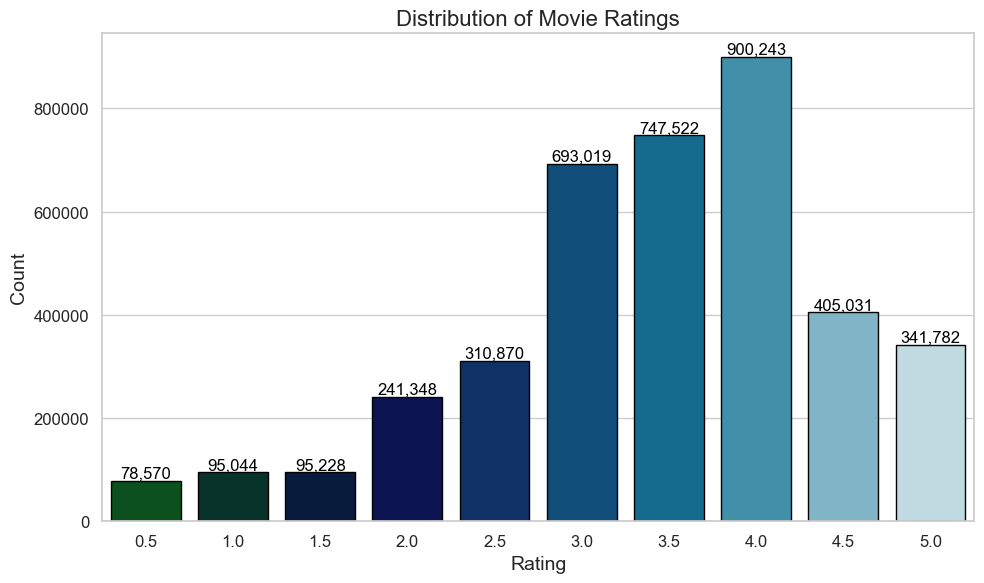

In [9]:
# Convert the rating distribution DataFrame to pandas for plotting
rating_distribution_pd = rating_distribution_data.toPandas()

# Setting up Seaborn style
sns.set_theme(style="whitegrid")

# Create the bar chart with Seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='rating', y='count', data=rating_distribution_pd, palette='ocean', edgecolor='black')

# Add labels on the bars
for i in range(len(rating_distribution_pd)):
    bar_plot.text(i, rating_distribution_pd['count'][i], f'{rating_distribution_pd["count"][i]:,}', 
                ha='center', va='bottom', fontsize=12, color='black')

# Set labels and title
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the graph
plt.tight_layout()
plt.show()

In [10]:
# Stop the Spark session
spark.stop()